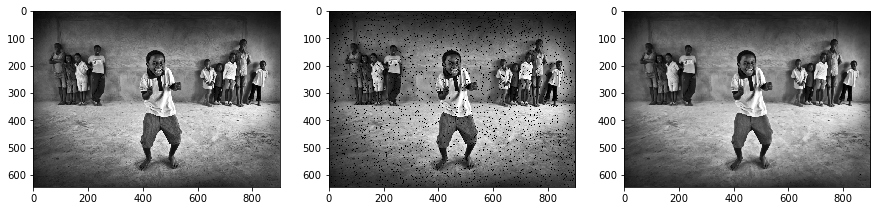

# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image


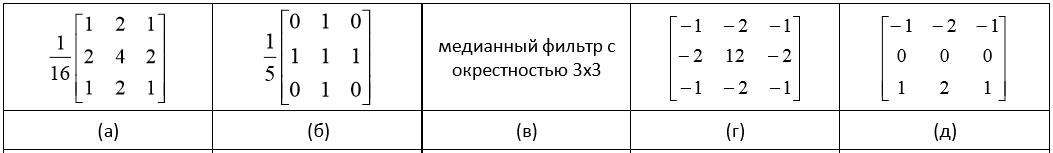

In [9]:

from matplotlib import pyplot as plt
import cv2
import numpy as np
import skimage 
from matplotlib import image as pltimg
import scipy.ndimage as spimg
img = cv2.imread('./ads.jpg',0);
img_noise = skimage.util.random_noise(img, mode='s&p', seed=None, clip=True)

kernel_a = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype = 'float32')
kernel_a = kernel_a/16
kernel_b = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype = 'float32')
kernel_b = kernel_b/5
kernel_g = np.array([[-1, -2, -1],[-2, 12, -2],[-1, -2, -1]], dtype = 'float32')
kernel_d = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype = 'float32')

img_a = cv2.filter2D(img_noise,-1,kernel_a)
img_b = cv2.filter2D(img_noise,-1,kernel_b)
img_v = spimg.median_filter(img_noise,size = 3)
img_g = cv2.filter2D(img_noise,-1,kernel_g)
img_d = cv2.filter2D(img_noise,-1,kernel_d)

fig = plt.figure(figsize=(15,10))
plt.subplot(241)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.subplot(242)
plt.imshow(img_noise, cmap='gray')
plt.title('image with salt & pepper noise')
plt.subplot(243)
plt.imshow(img_a, cmap='gray')
plt.title('image with filter a')
plt.subplot(244)
plt.imshow(img_b, cmap='gray')
plt.title('image with filter b')
plt.subplot(245)
plt.imshow(img_v, cmap='gray')
plt.title('image with median filter, size 3')
plt.subplot(246)
plt.imshow(img_g, cmap='gray')
plt.title('image with filter g')
plt.subplot(247)
plt.imshow(img_d, cmap='gray')
plt.title('image with filter d')
plt.show()

ModuleNotFoundError: No module named 'cv2'

### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

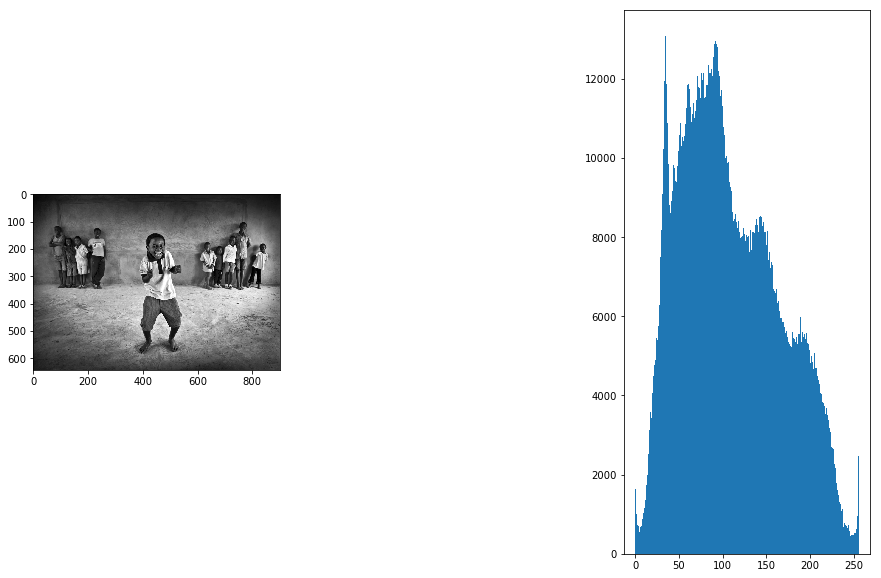

In [6]:
#task2
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
image = img.imread('./ads.jpg')

fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(image)
plt.subplot(133)
plt.hist(image.ravel(),256,[0,256]);

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

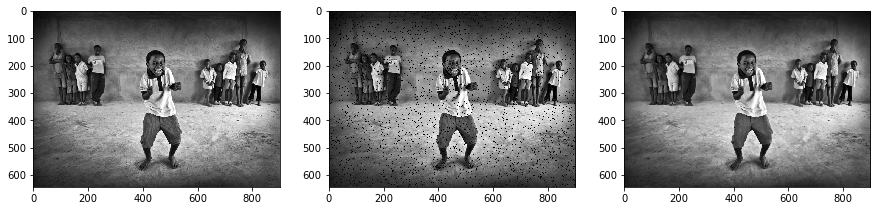

In [5]:
#task3
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline
def addsp(gb, prob):

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy
image = img.imread('./ads.jpg')

salt = addsp(image,0.02)
salt = addsp(image,0.02)
res = ndimage.median_filter(salt, 3)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(salt)
plt.subplot(133)
plt.imshow(res)

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.